In [1]:
import pde
import phasesep as ps
import numpy as np
import random
import tracker
import matplotlib.pyplot as plt

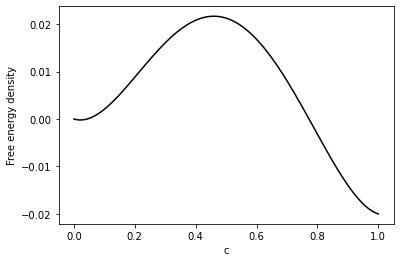

In [2]:
f_scale = 1
f_slope = -0.02
f_offset = 0

f = ps.GinzburgLandau2Components(
    prefactor=f_scale,
    slope=f_slope,
    offset=f_offset
)
f.plot()

In [5]:
binodal = f.get_binodal()[0][0]
spinodal = f.get_spinodal()[0]
binodal_range = spinodal - binodal

In [3]:
kappa = 1
diffusive_mobility = 1
noise_diffusion = 2/30

eq = ps.CahnHilliardExtendedPDE(
    {
        "free_energy": f,
        "kappa": kappa,
        "mobility": diffusive_mobility,
        "noise_diffusion": noise_diffusion
    }
)
eq.cache_rhs = True

In [4]:
length_scale = 1

nx, ny = 32, 32
x_start, x_end = -nx/2*length_scale, nx/2*length_scale
y_start, y_end = -ny/2*length_scale, ny/2*length_scale
grid = pde.CartesianGrid(
    bounds=[(x_start, x_end), (y_start, y_end)],
    shape=[nx,ny],
    periodic=True)

0.209211616751135


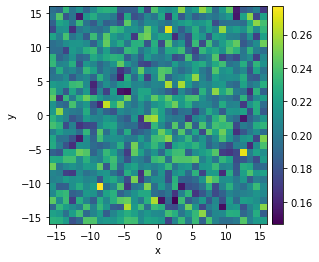

In [12]:
phi0 = binodal + 0.99*binodal_range

initial_field = pde.ScalarField.random_normal(
    grid=grid,
    mean=phi0,
    std=phi0*0.1
)
print(phi0)
initial_field.plot()

In [ ]:
dt = 1e-3
t_end = 1e3

opar = tracker.DropletMaterialTracker(op_max=100, op_min=-1, ncrossings=1, history=True)
storage = pde.MemoryStorage(field_obj=initial_field, write_mode="truncate_once")
prog = pde.ProgressTracker()
stor = storage.tracker()
plot = pde.PlotTracker(interval=10, show=True)
final = eq.solve(
        state=initial_field,
        t_range=t_end,
        tracker=[stor, plot, opar],
        method="explicit",
        dt=dt
    )
final.plot()

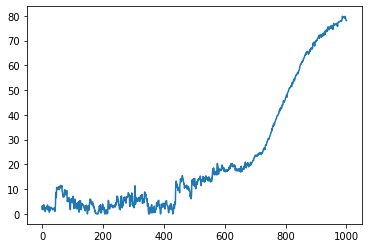

In [14]:
plt.plot(opar.op_history)

In [ ]:
possible_interfaces = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 60, 80]